In [26]:
#Packages and module imported
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.colors as mcolors
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder


In [27]:
# Uploading the xlsx files with metabolites concentrations and the metadata
from google.colab import drive
drive.mount('/content/drive')

data_NTs = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Data_NTs_Alberto.xlsx')
data_NTs = data_NTs.rename(columns={"Sample": "ID"})


print(data_NTs.head(3))
print(data_NTs.columns)
print(data_NTs.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      ID   Groups    8-oxo-dGUO 8-OH-guanosine       Adenosine  \
0  EC002   No_TSE            ND   1.0109900576  410.1466669467   
1  EC003  TSE_out  5.1589000000   4.7336628732  772.9812535269   
2  EC004      SHS 11.1640000000   3.7014600732 2159.7783546889   

      Anthranilic     Cotinine       Dopamine    Epinephrine            GABA  \
0  669.6871751345           NQ 162.9866924887  15.0379165142 1016.8061166902   
1  443.1123632205 0.7134376875 426.8518004314 105.9985367000 1455.4673153292   
2 2641.5079493566 6.8888985918 521.0781293374 136.9510439653 1717.0607951900   

   ...      Kynurenine     Melatonin          NNAL  Norepinephrine  \
0  ... 1277.5465211848 64.7878496605  2.2353756576  139.4137153634   
1  ...  890.9153579268 75.2123962649  1.1117099304   56.7854173743   
2  ...   92.5746144992 21.9483986782 11.7553900000  252.3747211250   

    

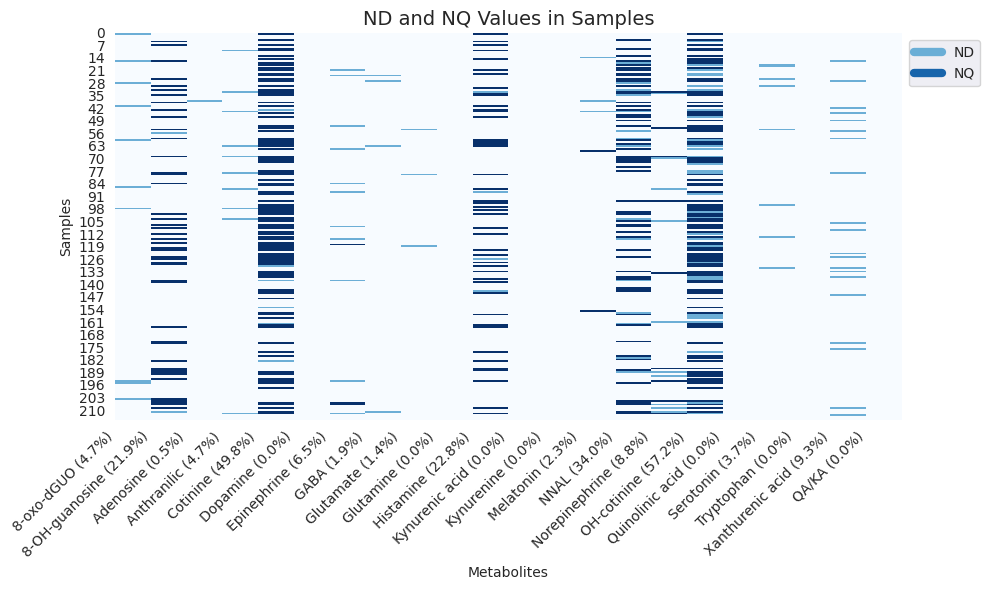

In [28]:
# Visualization of ND and NQ values across the NTs_data dataset
data_clean = data_NTs.drop(columns=['ID', 'Groups'])

# Create masks for ND and NQ values
nd_mask = data_clean == 'ND'
nq_mask = data_clean == 'NQ'

# Color map settings for the heatmap
cmap = plt.cm.Blues
bounds = [0, 0.5, 1.5, 2]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a numerical mask: 1 for ND, 2 for NQ, and 0 for others
data = np.select([nd_mask, nq_mask], [1, 2], default=0)
metabolites_names = data_clean.columns.tolist()

# Calculate the percentage of missing values (ND + NQ) for each column
missing_percent = (nd_mask | nq_mask).mean() * 100
metabolites_with_percent = [f'{name} ({missing_percent:.1f}%)' for name, missing_percent in zip(metabolites_names, missing_percent)]

# Set the visualization style and create the heatmap
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.heatmap(data, cbar=False, cmap=cmap, norm=norm)
plt.title('ND and NQ Values in Samples', fontsize=14)
plt.ylabel('Samples')
plt.xlabel('Metabolites')

# Add the metabolite names and the percentage of missing values
plt.xticks(range(len(metabolites_names)), metabolites_with_percent, rotation=45, ha='right')

# Create a custom legend for ND and NQ values
legend_elements = [Line2D([0], [0], color=cmap(0.5), lw=6, label='ND'),
                   Line2D([0], [0], color=cmap(0.8), lw=6, label='NQ')]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better fit
plt.tight_layout()
plt.show()

<ipython-input-29-cb5b5f1b0192>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  na_percentage = data_NTs.replace(['ND', 'NQ'], np.nan)
<ipython-input-29-cb5b5f1b0192>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_percentage = na_percentage.groupby('Groups').apply(lambda x: x.isna().mean() * 100)


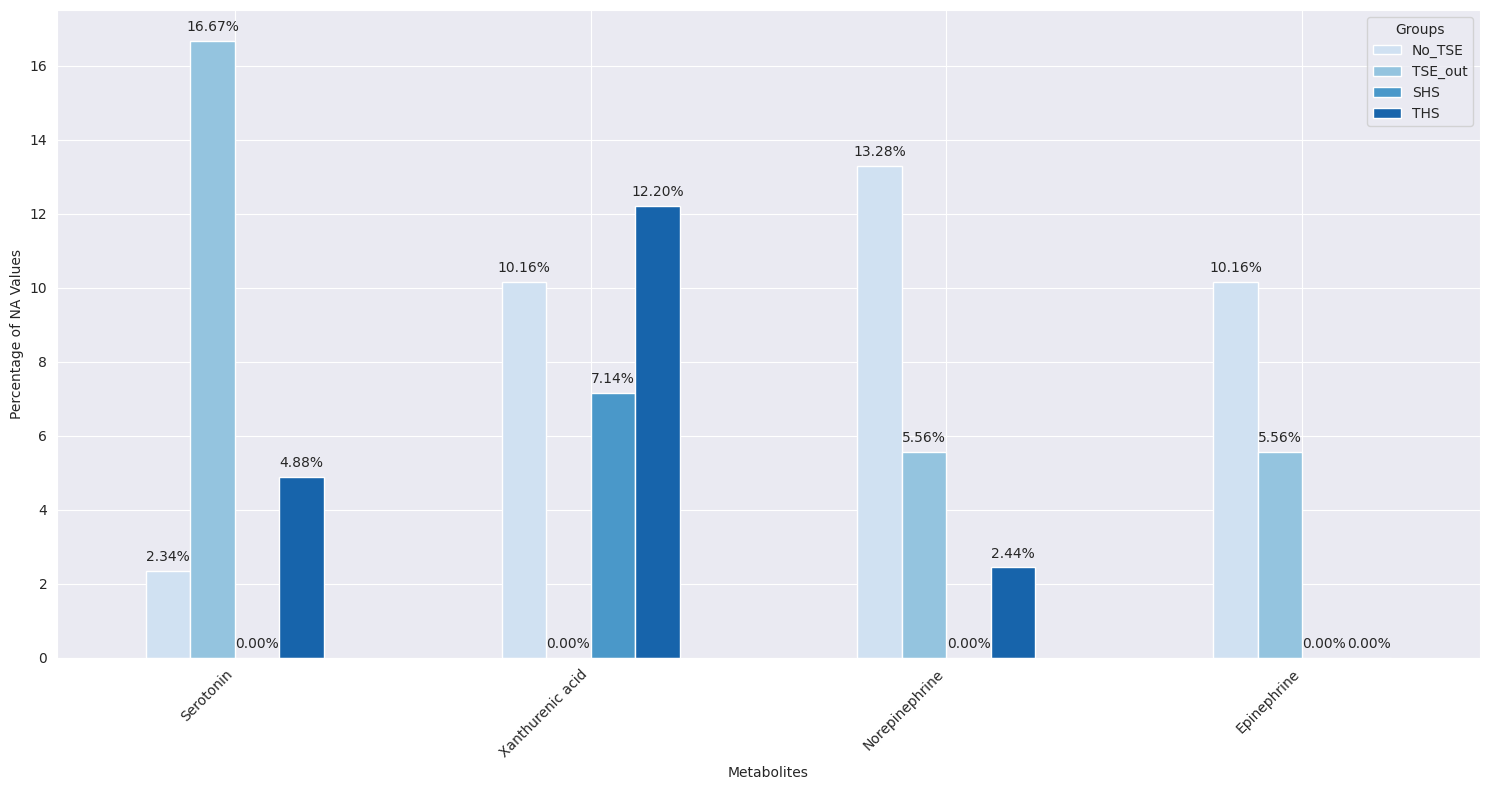

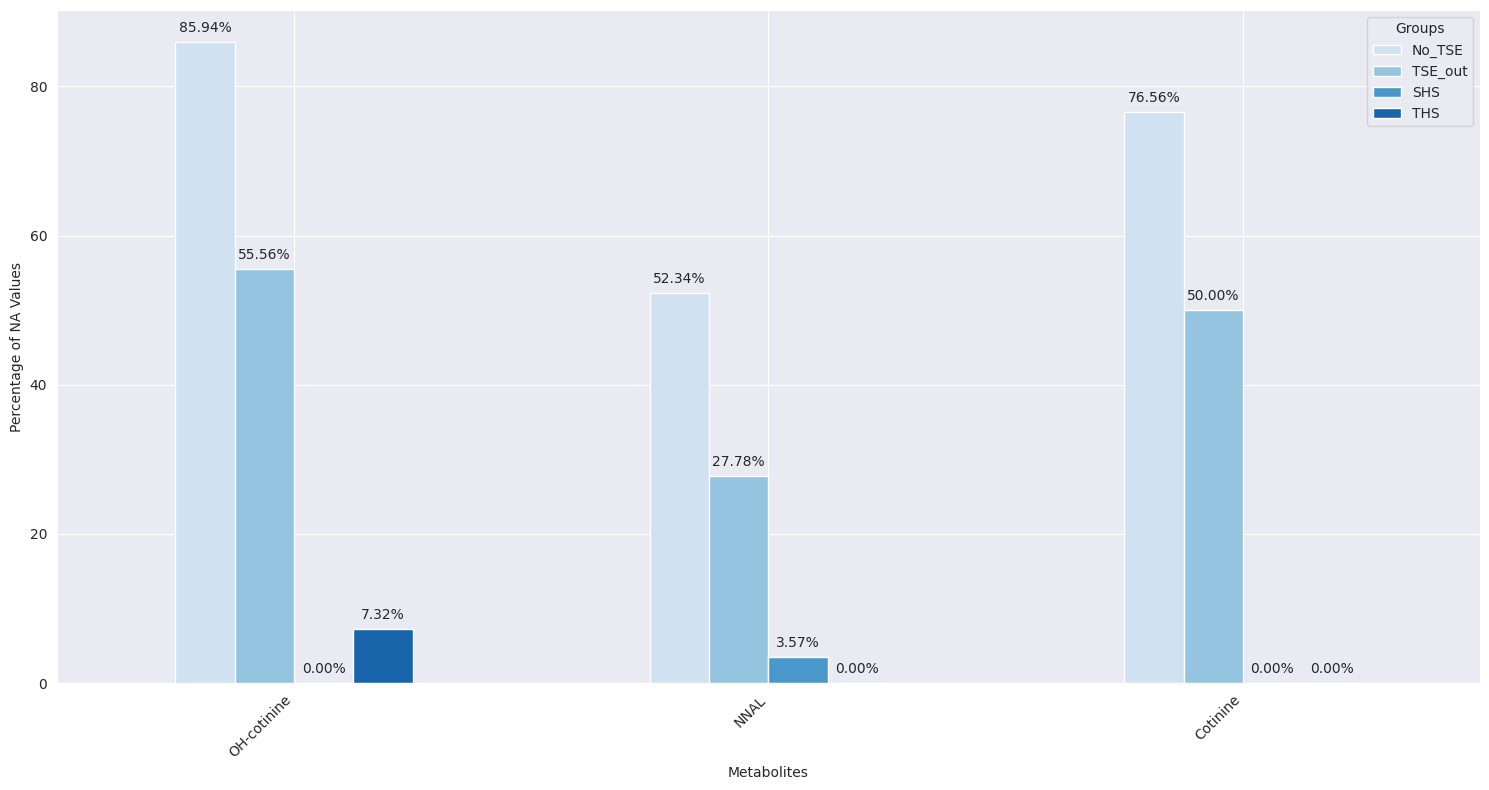

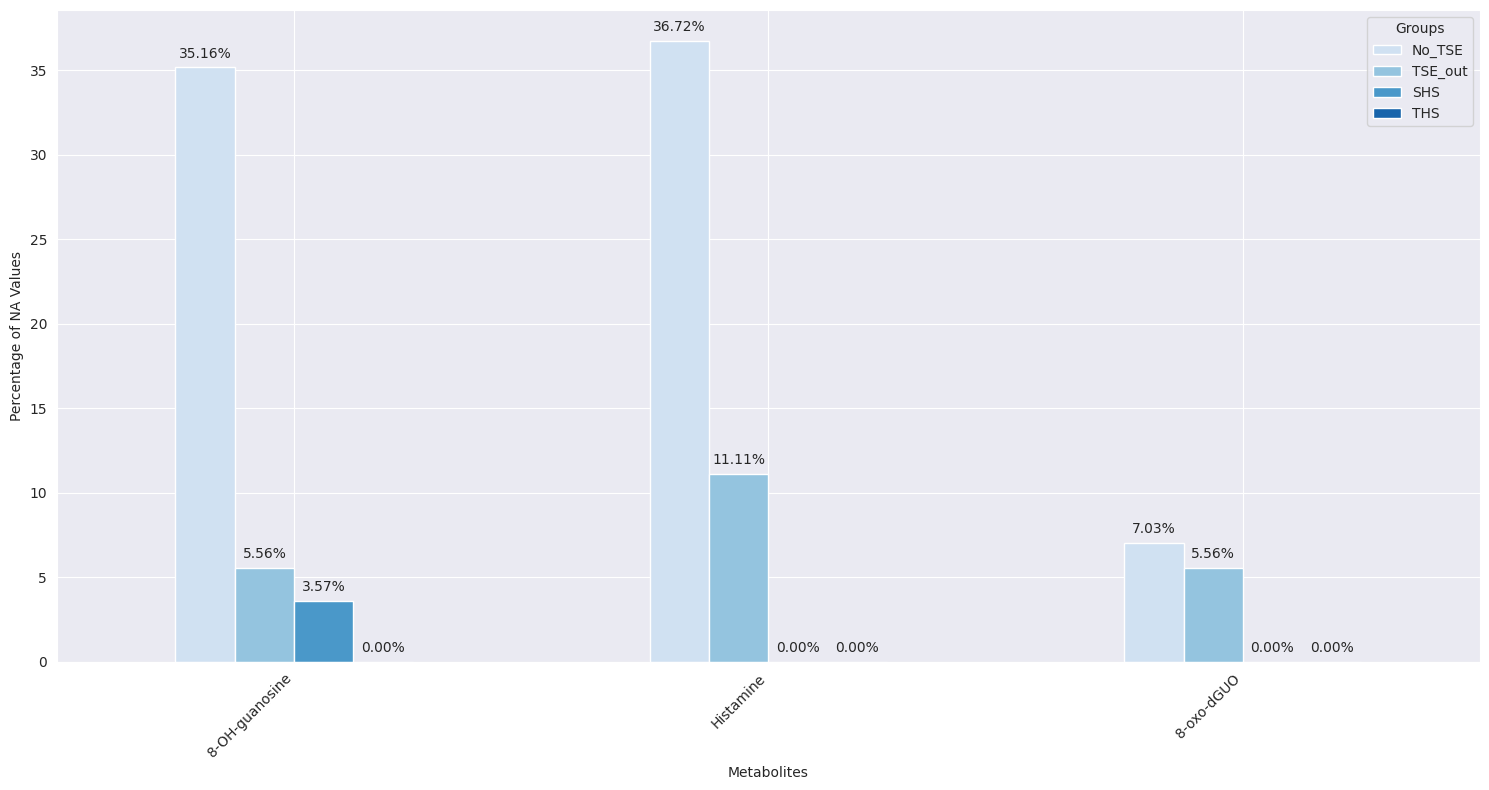

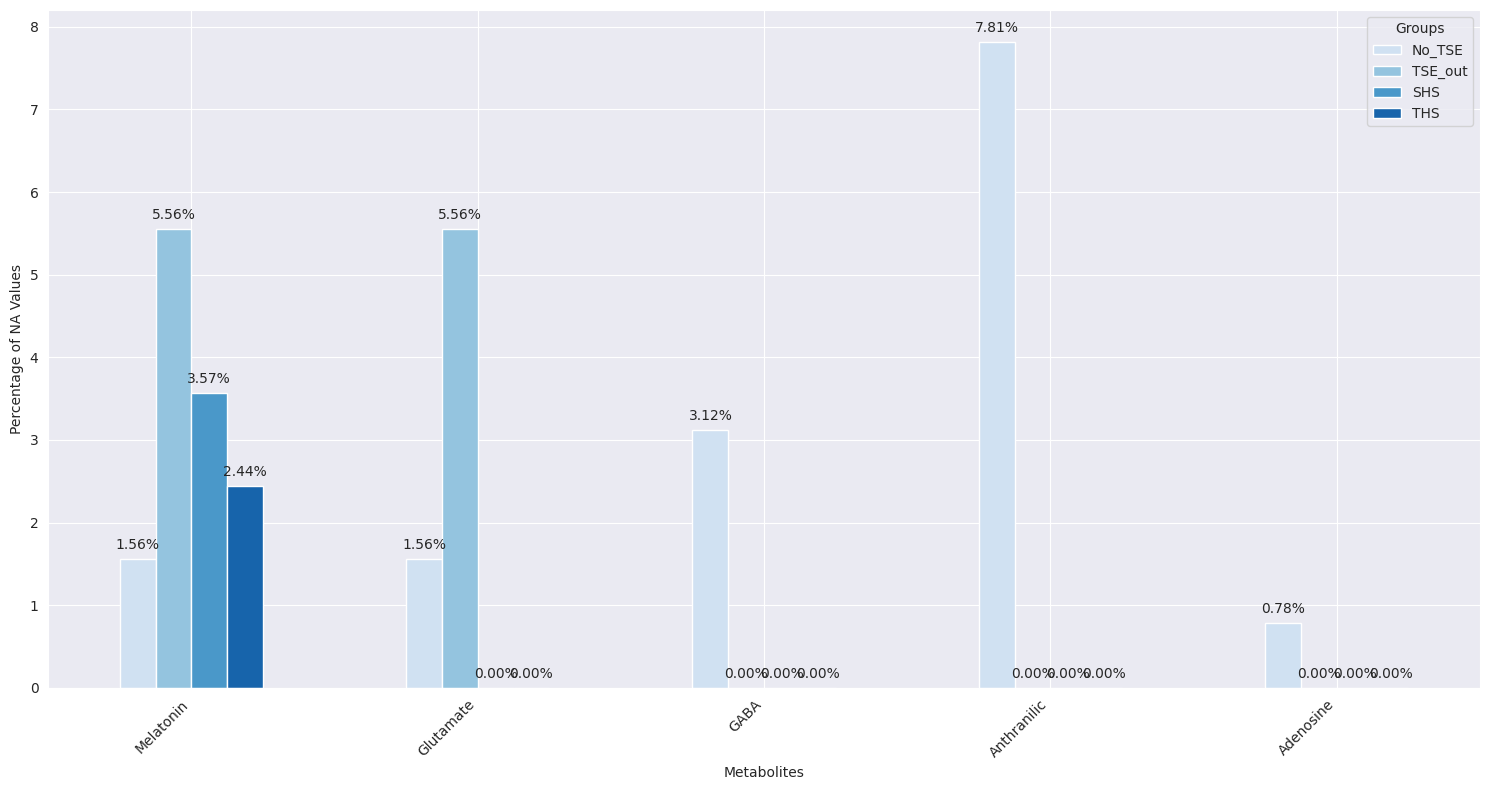

In [29]:
# Calculate the percentage of NA values for each metabolite and group
na_percentage = data_NTs.replace(['ND', 'NQ'], np.nan)
na_percentage = na_percentage.groupby('Groups').apply(lambda x: x.isna().mean() * 100)
na_percentage = na_percentage.replace(['ND', 'NQ'], np.nan)
na_percentage = na_percentage.T

# Filter out metabolites that have 0% missing values across all groups
na_percentage_filtered = na_percentage[(na_percentage > 0).any(axis=1)]

# Define the specific groups of metabolites for each graphic
group_1 = ['Serotonin', 'Xanthurenic acid', 'Norepinephrine', 'Epinephrine']
group_2 = ['OH-cotinine', 'NNAL', 'Cotinine']
group_3 = ['8-OH-guanosine', 'Histamine', '8-oxo-dGUO']
group_4 = ['Melatonin', 'Glutamate', 'GABA', 'Anthranilic', 'Adenosine']

# Function to plot and annotate the bar charts
def plot_metabolite_group(metabolites):
    subset = na_percentage_filtered.loc[metabolites]

    # Reordena las columnas
    subset = subset.reindex(columns=['No_TSE', 'TSE_out', 'SHS', 'THS'])

    # Create a grouped bar plot for the selected metabolites
    ax = subset.plot(kind='bar', figsize=(15, 8), color=sns.color_palette("Blues", len(subset.columns)))
    plt.xlabel('Metabolites')
    plt.ylabel('Percentage of NA Values')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Groups')

    # Add percentage values above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Plot each group of metabolites
plot_metabolite_group(group_1)
plot_metabolite_group(group_2)
plot_metabolite_group(group_3)
plot_metabolite_group(group_4)

# LOD and LOQ data preprocessing
In metabolomics, the Limit of Detection (LOD) and Limit of Quantification (LOQ) are critical parameters that determine the sensitivity and reliability of measurements. The LOD represents the lowest detectable concentration of a metabolite, while the LOQ is the lowest concentration that can be quantified with acceptable accuracy. Observations below the LOQ are often considered missing data and can introduce bias and inefficiency into data analysis.

There are several methods to handle missing data due to LOQ and LOD in metabolomics. Complete case analysis (CCA), which simply removes observations below the LOQ, can lead to a reduction in sample size and potential bias. Single imputation methods, such as replacing missing values with a constant like LOQ/2 or LOQ/√2, may introduce additional uncertainty. More sophisticated approaches, including maximum likelihood and Bayesian methods, offer more robust and flexible solutions for handling missing data in metabolomics.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4838401/ (LOQ,LOD and MNAR explanation)
https://pubmed.ncbi.nlm.nih.gov/37230469/ (CEMI)
https://www.nature.com/articles/s41598-017-19120-0 (QRLIC and other imputation methods)
https://link.springer.com/protocol/10.1007/978-1-0716-1967-4_6 (different LEft_Censored...)


- First approach will be to replace missing values with a constant such as LOQ/√2 and LOD/√2.

- Second approach will be replacing ND values for 0 and NQ values for LOQ/2.

- Third approach will be imputing the values without restriction.

- Fourth approach will be imputing with a restriction for ND values (0, LOD) and NQ values (LOD, LOQ) with IterativeImputer()

- Fifth approach will be imputing using QRILC (Quantile Regression Imputation of Left-Censored data) for the NQ in the range (LOD, LOQ) and imputing at random values between (0, LOD) for ND values. This last approach has been done in R Studio because there is no function that does it on Python. QRILC imputation was specifically designed for left-censored data, data missing caused by lower than LOQ. This method imputes missing elements with randomly drawing from a truncated distribution estimated by a quantile regression.

In [30]:
# LOD y LOQ values (in ppb)
lod_values = {
    '8-OH-guanosine': 0.15,
    '8-oxo-dGUO': 0.15,
    'Adenosine': 0.035,
    'Anthranilic': 0.15,
    'Cotinine': 0.010,
    'Dopamine': 0.025,
    'Epinephrine': 0.15,
    'GABA': 0.025,
    'Glutamate': 0.001,
    'Glutamine': 0.001,
    'Histamine': 0.025,
    'Kynurenic acid': 0.015,
    'Kynurenine': 0.015,
    'Melatonin': 0.005,
    'NNAL': 0.01,
    'Norepinephrine': 0.15,
    'OH-cotinine': 0.025,
    'Quinolinic acid': 0.15,
    'Serotonin': 0.025,
    'Tryptophan': 0.005,
    'Xanthurenic acid': 0.25}

loq_values = {
    '8-OH-guanosine': 0.45,
    '8-oxo-dGUO': 0.4,
    'Adenosine': 10,
    'Anthranilic': 60,
    'Cotinine': 0.6,
    'Dopamine': 2,
    'Epinephrine': 25,
    'GABA': 0.55,
    'Glutamate': 5,
    'Glutamine': 7,
    'Histamine': 0.03,
    'Kynurenic acid': 0.06,
    'Kynurenine': 55,
    'Melatonin': 15,
    'NNAL': 0.3,
    'Norepinephrine': 25,
    'OH-cotinine': 0.4,
    'Quinolinic acid': 5,
    'Serotonin': 20,
    'Tryptophan': 10,
    'Xanthurenic acid': 6}

In [31]:
# Add the encoded groups column
groups_enc = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/metadata_statistics_D1_1.xlsx')
data_NTs['Groups_encoded'] = groups_enc['Exposure_Group']
data_NTs = data_NTs.drop(columns=['ID', 'Groups'])
object_cols = data_NTs.select_dtypes(include=['object']).columns
data_NTs[object_cols] = data_NTs[object_cols].apply(pd.to_numeric, errors='coerce')

# Importing different data imputation datasets and adding the column groups_encoded
NTs_QRILC = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/data_QRILC.xlsx')
NTs_QRILC['Groups_encoded'] = data_NTs['Groups_encoded']

NTs_HM = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/data_HM.xlsx')
NTs_HM['Groups_encoded'] = data_NTs['Groups_encoded']

NTs_mice = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/data_MICE.xlsx')
NTs_mice['Groups_encoded'] = data_NTs['Groups_encoded']

NTs_randomNDNQ = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/data_randomNDNQ.xlsx')
NTs_randomNDNQ['Groups_encoded'] = data_NTs['Groups_encoded']

NTs_GSIMP = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/data_GSIMP.xlsx')
NTs_GSIMP['Groups_encoded'] = data_NTs['Groups_encoded']

datasets = {
    'NTs_QRILC': NTs_QRILC,
    'NTs_HM': NTs_HM,
    'NTs_MICE': NTs_mice,
    'NTs_randomNDNQ': NTs_randomNDNQ,
    'NTs_GSIMP': NTs_GSIMP}

for name, dataset in datasets.items():
    dataset.columns = [col.replace('X8.oxo.dGUO', '8-oxo-dGUO')
                             .replace('X8.OH.guanosine', '8-OH-guanosine')
                             .replace('Kynurenic.acid', 'Kynurenic acid')
                             .replace('OH.cotinine', 'OH-cotinine')
                             .replace('Quinolinic.acid', 'Quinolinic acid')
                             .replace('Xanthurenic.acid', 'Xanthurenic acid')
                       for col in dataset.columns]
data_NTs.columns
NTs_mice.columns


Index(['8-oxo-dGUO', '8-OH-guanosine', 'Adenosine', 'Anthranilic', 'Cotinine',
       'Dopamine', 'Epinephrine', 'GABA', 'Glutamate', 'Glutamine',
       'Histamine', 'Kynurenic acid', 'Kynurenine', 'Melatonin', 'NNAL',
       'Norepinephrine', 'OH-cotinine', 'Quinolinic acid', 'Serotonin',
       'Tryptophan', 'Xanthurenic acid', 'Groups_encoded'],
      dtype='object')

In [32]:
def count_and_get_values(data, nd_mask, nq_mask, lod_values, loq_values):
    nd_out_of_range = {}
    nq_out_of_range = {}
    nd_values_out = {}
    nq_values_out = {}
    nd_values_in = {}
    nq_values_in = {}

    for metabolite in lod_values.keys():
        lod = lod_values[metabolite]
        loq = loq_values[metabolite]

        nd_vals = data[metabolite][nd_mask[metabolite]]
        nd_out_of_range[metabolite] = ((nd_vals < 0) | (nd_vals > lod)).sum()
        nd_values_out[metabolite] = nd_vals[(nd_vals < 0) | (nd_vals > lod)].tolist()
        nd_values_in[metabolite] = nd_vals[(nd_vals >= 0) & (nd_vals <= lod)].tolist()

        nq_vals = data[metabolite][nq_mask[metabolite]]
        nq_out_of_range[metabolite] = ((nq_vals < lod) | (nq_vals > loq)).sum()
        nq_values_out[metabolite] = nq_vals[(nq_vals < lod) | (nq_vals > loq)].tolist()
        nq_values_in[metabolite] = nq_vals[(nq_vals >= lod) & (nq_vals <= loq)].tolist()

    return nd_out_of_range, nq_out_of_range, nd_values_out, nq_values_out, nd_values_in, nq_values_in
rows = []
for name, dataset in datasets.items():
    nd_out, nq_out, nd_out_vals, nq_out_vals, nd_in_vals, nq_in_vals = count_and_get_values(
        dataset, nd_mask, nq_mask, lod_values, loq_values)

    for metabolite in lod_values.keys():
        if metabolite in nd_out and metabolite in nd_out_vals and metabolite in nd_in_vals:
            rows.append({
                'Metabolite': metabolite,
                'Imputation_Method': name,
                'ND_out_of_range': nd_out[metabolite],
                'ND_values_out_of_range': nd_out_vals[metabolite],
                'ND_values_in_range': nd_in_vals[metabolite],
                'NQ_out_of_range': nq_out[metabolite],
                'NQ_values_out_of_range': nq_out_vals[metabolite],
                'NQ_values_in_range': nq_in_vals[metabolite]
            })

out_of_range_df = pd.DataFrame(rows)
out_of_range_df = out_of_range_df.sort_values(by=['Metabolite', 'Imputation_Method'])
print(out_of_range_df)
out_of_range_df.to_excel('imputation_out_of_range.xlsx', index=False)

           Metabolite Imputation_Method  ND_out_of_range  \
84     8-OH-guanosine         NTs_GSIMP                2   
21     8-OH-guanosine            NTs_HM                2   
42     8-OH-guanosine          NTs_MICE                2   
0      8-OH-guanosine         NTs_QRILC                2   
63     8-OH-guanosine    NTs_randomNDNQ                0   
..                ...               ...              ...   
104  Xanthurenic acid         NTs_GSIMP               20   
41   Xanthurenic acid            NTs_HM               20   
62   Xanthurenic acid          NTs_MICE               20   
20   Xanthurenic acid         NTs_QRILC               20   
83   Xanthurenic acid    NTs_randomNDNQ               20   

                                ND_values_out_of_range  \
84              [0.482662003927299, 0.223427241307643]   
21                                        [0.25, 0.25]   
42                                    [5.5914, 1.1392]   
0               [0.410696450281058, 0.548210515

In [33]:
import statsmodels.api as sm

# Function to get regression stats for each model
def get_regression_stats(data, target_col):
    X = sm.add_constant(data.drop(target_col, axis=1))
    y = data[target_col]
    model = sm.OLS(y, X).fit()
    return model.params, model.bse

results = {}
for name, dataset in datasets.items():
    params, bse = get_regression_stats(dataset, 'Groups_encoded')
    results[name] = {
        'params': params,
        'bse': bse}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    (method, 'Coefficient'): results[method]['params']
    for method in results
}).reset_index().rename(columns={'level_0': 'Metabolite'})

comparison_df_bse = pd.DataFrame({
    (method, 'Standard Deviation'): results[method]['bse']
    for method in results
}).reset_index().rename(columns={'level_0': 'Metabolite'})

print(comparison_df)
print(comparison_df_bse)

               index     NTs_QRILC        NTs_HM      NTs_MICE NTs_randomNDNQ  \
                       Coefficient   Coefficient   Coefficient    Coefficient   
0              const -1.6575874544 -0.1115723176 -1.5766860255  -0.0877834955   
1         8-oxo-dGUO -0.0261377280 -0.0165481656 -0.0226148309  -0.0145228576   
2     8-OH-guanosine  0.0666543675  0.0674624670  0.0429174218   0.0695932894   
3          Adenosine  0.0006048796  0.0005971675  0.0006224463   0.0005979883   
4        Anthranilic  0.0008484592  0.0007754040  0.0008545897   0.0007598005   
5           Cotinine -0.0273959462 -0.0199047812 -0.0282464055  -0.0188048934   
6           Dopamine  0.0001098457  0.0001121630  0.0002531615   0.0001031213   
7        Epinephrine  0.0014907620  0.0013875408 -0.0001090058   0.0016531768   
8               GABA  0.0004493819  0.0003872735  0.0005144697   0.0003019982   
9          Glutamate  0.0005987469 -0.0002227183  0.0010578612  -0.0002082954   
10         Glutamine -0.0000

In [34]:
import matplotlib.cm as cm
data_NTs_nan = data_NTs.replace(['ND', 'NQ'], np.nan)
data_NTs_nan = data_NTs_nan.apply(pd.to_numeric, errors='coerce')

metabolites = list(lod_values.keys())


# Plotting each metabolite's boxplot for all methods
for metabolite in metabolites:
    fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

    for idx, (method, dataset) in enumerate(datasets.items()):
        ax = axes[idx]

        data = dataset[metabolite]
        imputed_ND = nd_mask[metabolite]
        imputed_NQ = nq_mask[metabolite]

        # Plot the boxplot for the imputed data
        sns.boxplot(data=data, ax=ax, color='white')

        ngroup = 3
        cmap = cm.Blues

        xs_nd = np.random.normal(1, 0.04, sum(imputed_ND))
        xs_nq = np.random.normal(2, 0.04, sum(imputed_NQ))
        xs_other = np.random.normal(3, 0.04, len(data) - sum(imputed_ND) - sum(imputed_NQ))

        ax.scatter(xs_nd, data[imputed_ND], color=cmap(0.5), alpha=0.4, label='Imputed ND')
        ax.scatter(xs_nq, data[imputed_NQ], color=cmap(0.8), alpha=0.4, label='Imputed NQ')
        ax.scatter(xs_other, data[~imputed_ND & ~imputed_NQ], color='gray', alpha=0.4)

        # Condición para añadir líneas de LOD y LOQ si hay valores faltantes
        if data_NTs_nan[metabolite].isna().sum() > 0:
            lod = lod_values[metabolite]
            loq = loq_values[metabolite]
            ax.axhline(y=lod, color=cmap(0.5), linestyle='--', alpha=0.5, label='LOD')
            ax.axhline(y=loq, color=cmap(0.8), linestyle='--', alpha=0.5, label='LOQ')

        ax.set_title(f'{metabolite} - {method}')
        ax.set_xlabel('Concentration')

    plt.suptitle(f'Boxplot for {metabolite}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Save the plot as a JPG file
    file_name = f"{metabolite}_boxplot.jpg"
    plt.savefig(file_name, format='jpg', dpi=300)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [35]:
# LOD/2 and LOQ/2 dataset generation
data_NTs = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Data_NTs_Alberto.xlsx')

lodq2 = data_NTs.drop(columns=['Sample', 'Groups','QA/KA'])
for metabolite in lod_values.keys():
    if metabolite in lodq2.columns:
        # Replace 'ND' with LOD/2
        lodq2[metabolite] = lodq2[metabolite].replace('ND', lod_values[metabolite] / 2)
        # Replace 'NQ' with LOQ/2
        lodq2[metabolite] = lodq2[metabolite].replace('NQ', loq_values[metabolite] / 2)

lodq2 = lodq2.apply(pd.to_numeric, errors='coerce')
lodq2['Groups_encoded'] = NTs_QRILC['Groups_encoded']

# LOD/sqrt(2) and LOQ/sqrt(2) dataset generation
lodqsqrt2 = data_NTs.drop(columns=['Sample', 'Groups','QA/KA'])
for metabolite in lod_values.keys():
    if metabolite in lodqsqrt2.columns:
        # Replace 'ND' with LOD/2
        lodqsqrt2[metabolite] = lodqsqrt2[metabolite].replace('ND', lod_values[metabolite] / np.sqrt(2))
        # Replace 'NQ' with LOQ/2
        lodqsqrt2[metabolite] = lodqsqrt2[metabolite].replace('NQ', loq_values[metabolite] / np.sqrt(2))

lodqsqrt2 = lodqsqrt2.apply(pd.to_numeric, errors='coerce')
lodqsqrt2['Groups_encoded'] = NTs_QRILC['Groups_encoded']


<ipython-input-35-b06e60df56c3>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lodq2[metabolite] = lodq2[metabolite].replace('NQ', loq_values[metabolite] / 2)
<ipython-input-35-b06e60df56c3>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lodq2[metabolite] = lodq2[metabolite].replace('ND', lod_values[metabolite] / 2)
<ipython-input-35-b06e60df56c3>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [36]:
lodqsqrt2.isna().sum()

,0
8-oxo-dGUO,0
8-OH-guanosine,0
Adenosine,0
Anthranilic,0
Cotinine,0
Dopamine,0
Epinephrine,0
GABA,0
Glutamate,0
Glutamine,0


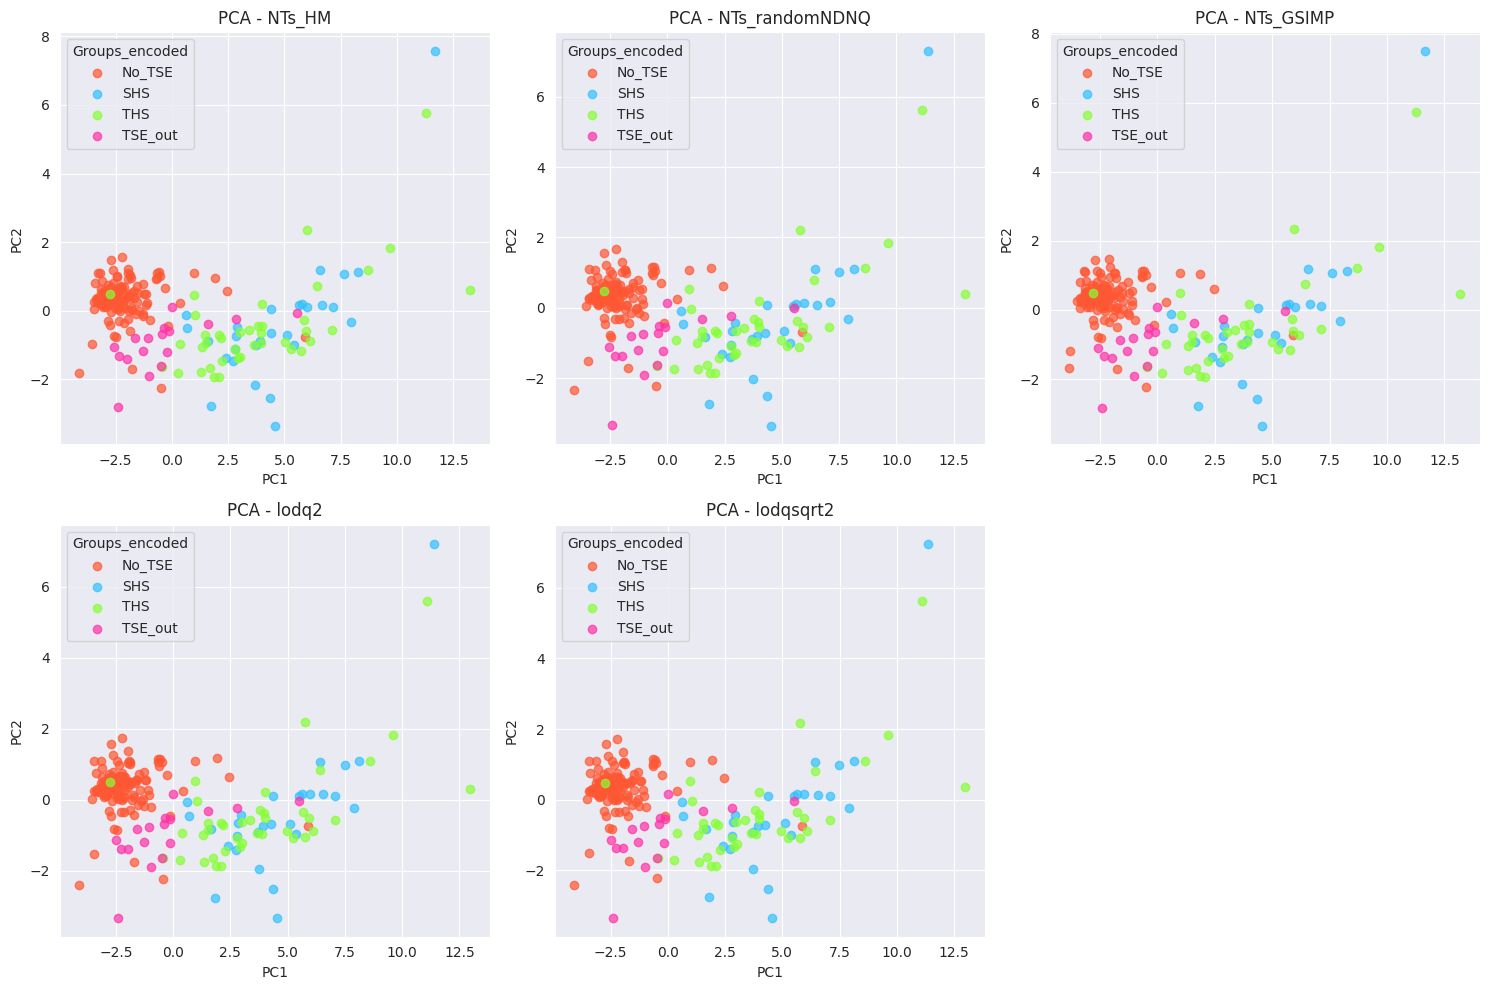

NTs_HM - Explained Variance: PC1: 0.58, PC2: 0.06
NTs_randomNDNQ - Explained Variance: PC1: 0.57, PC2: 0.06
NTs_GSIMP - Explained Variance: PC1: 0.58, PC2: 0.06
lodq2 - Explained Variance: PC1: 0.57, PC2: 0.06
lodqsqrt2 - Explained Variance: PC1: 0.57, PC2: 0.06


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

datasets = {
    'NTs_HM': NTs_HM,
    'NTs_randomNDNQ': NTs_randomNDNQ,
    'NTs_GSIMP': NTs_GSIMP,
    'lodq2': lodq2,
    'lodqsqrt2' : lodqsqrt2}

group_mapping = {
    'No_TSE': 0,
    'SHS': 1,
    'THS': 2,
    'TSE_out': 3}

color_palette = {
    0: '#FF5733',
    1: '#33C1FF',
    2: '#85FF33',
    3: '#FF33A8'}

pca_results = {}
explained_variances = {}

# Standardize and perform PCA
plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(datasets.items()):
    # Extract Groups_encoded for coloring and excluding 'Groups_encoded'
    groups = data['Groups_encoded']
    data_without_groups = data.drop(columns=['Groups_encoded'])

    # Standardize the data and perform PCA
    scaled_data = StandardScaler().fit_transform(data_without_groups)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)
    pca_results[name] = principal_components
    explained_variances[name] = pca.explained_variance_ratio_

    # Plotting PCA results colored by Groups_encoded
    plt.subplot(2, 3, i + 1)
    for group, code in group_mapping.items():
        plt.scatter(principal_components[groups == code, 0],
                    principal_components[groups == code, 1],
                    alpha=0.7,
                    color=color_palette[code],
                    label=group)

    plt.title(f'PCA - {name}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.legend(title='Groups_encoded', loc='best')

plt.tight_layout()
plt.show()

# Display the explained variance for each dataset
for name, variance in explained_variances.items():
    print(f'{name} - Explained Variance: PC1: {variance[0]:.2f}, PC2: {variance[1]:.2f}')


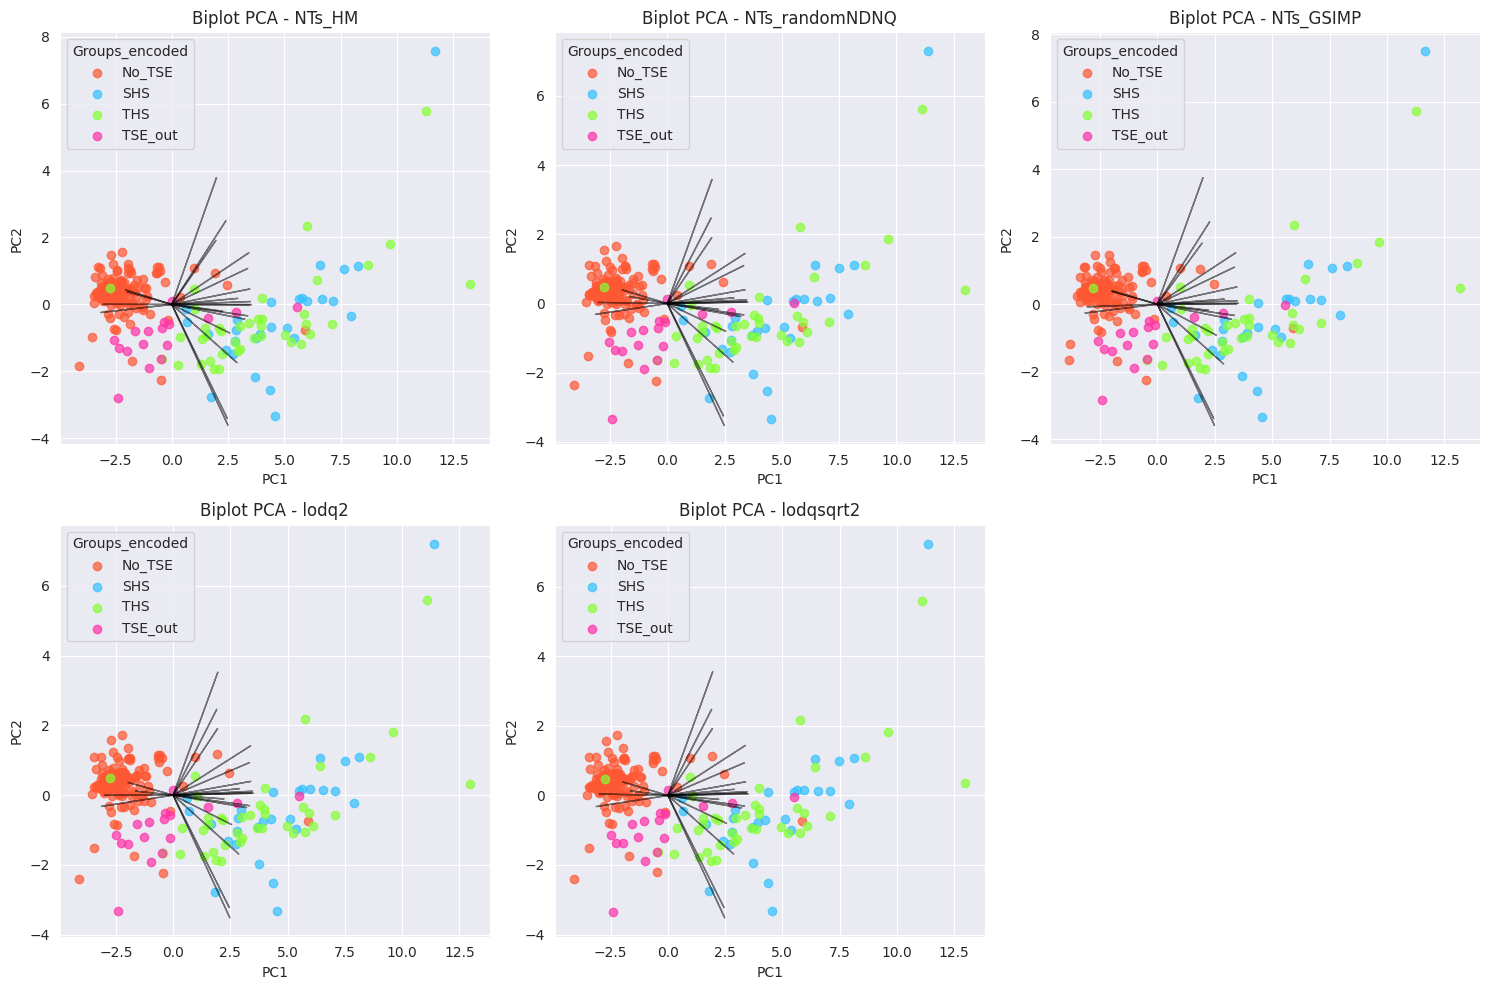

In [38]:
# Create a biplot for each dataset for another representation
plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(datasets.items()):
    groups = data['Groups_encoded']
    data_without_groups = data.drop(columns=['Groups_encoded'])
    scaled_data = StandardScaler().fit_transform(data_without_groups)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Group'] = groups

    # Plot the points
    plt.subplot(2, 3, i + 1)
    for group, code in group_mapping.items():
        plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                    pca_df[pca_df['Group'] == code]['PC2'],
                    alpha=0.7,
                    color=color_palette[code],
                    label=group)

    # Add arrows for the variables
    for j in range(pca.components_.shape[1]):
        plt.arrow(0, 0, pca.components_[0, j] * max(pca_df['PC1']),
                  pca.components_[1, j] * max(pca_df['PC2']),
                  color='k', alpha=0.5)

    plt.title(f'Biplot PCA - {name}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.legend(title='Groups_encoded', loc='best')

plt.tight_layout()
plt.show()

In [39]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create the mask of missing values (ND and NQ)
imputed_mask = data_NTs.replace(['ND', 'NQ'], np.nan).isna()

anova_results = {}
tukey_results = []

# Loop through all metabolites to perform ANOVA only on imputed values
for metabolite in lod_values.keys():
    values = []
    groups = []

    for method, data in datasets.items():
        # Select only imputed values using the mask
        imputed_values = data[metabolite][imputed_mask[metabolite]]
        values.extend(imputed_values.dropna())
        groups.extend([method] * len(imputed_values.dropna()))

    # Perform ANOVA if there are values for multiple groups
    if len(set(groups)) > 1 and len(values) > 0:
        f_stat, p_value = stats.f_oneway(
            *(data[metabolite][imputed_mask[metabolite]].dropna() for method, data in datasets.items() if metabolite in data.columns)
        )
        anova_results[metabolite] = {'F-statistic': f_stat, 'p-value': p_value}

        # If the ANOVA result is significant, perform Tukey's HSD test
        if p_value < 0.05:  # Only perform post-hoc if ANOVA is significant
            tukey = pairwise_tukeyhsd(endog=np.array(values),
                                      groups=np.array(groups),
                                      alpha=0.05)

            # Extract results from Tukey HSD summary and convert to DataFrame
            tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
            tukey_df['Metabolite'] = metabolite  # Add metabolite name for easier identification
            tukey_results.append(tukey_df)

# Convert ANOVA results to DataFrame for better visualization
anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.rename(columns={'F-statistic': 'F_stat', 'p-value': 'p_value'})
anova_df = anova_df.sort_values(by='p_value')

# Combine all Tukey HSD results into a single DataFrame
if tukey_results:
    tukey_combined_df = pd.concat(tukey_results, ignore_index=True)
else:
    tukey_combined_df = pd.DataFrame()

# Set display options for better visualization of p-values
pd.options.display.float_format = '{:.10f}'.format

# Print the ANOVA results
print("ANOVA Results:")
print(anova_df)
anova_df.to_excel('anova_results.xlsx')

# Print Tukey's HSD results in a DataFrame format
print("\nTukey Post-Hoc Results for Significant Metabolites:")
if not tukey_combined_df.empty:
    print(tukey_combined_df)
    tukey_combined_df.to_excel('tukey_results.xlsx')
else:
    print("No significant metabolites found for Tukey HSD.")


<ipython-input-39-f6f2c0aaf4bd>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  imputed_mask = data_NTs.replace(['ND', 'NQ'], np.nan).isna()
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


ANOVA Results:
                         F_stat      p_value
Histamine        428.8123466727 0.0000000000
NNAL             156.9692236895 0.0000000000
Xanthurenic acid 126.9513200846 0.0000000000
Cotinine          42.9655494398 0.0000000000
8-OH-guanosine    22.0419478655 0.0000000000
GABA             377.3303703100 0.0000000000
8-oxo-dGUO        19.9541976216 0.0000000017
Anthranilic       17.1017583334 0.0000000135
Serotonin         16.0730577838 0.0000001466
OH-cotinine        7.9544860797 0.0000029673
Glutamate         12.0851948463 0.0007609438
Norepinephrine     4.7348696673 0.0016338435
Epinephrine        1.9099738341 0.1193256112
Melatonin          0.2168196304 0.9259498050
Adenosine                   NaN          NaN

Tukey Post-Hoc Results for Significant Metabolites:
             group1          group2        meandiff        p-adj  \
0         NTs_GSIMP          NTs_HM    0.1050000000 0.0000000000   
1         NTs_GSIMP  NTs_randomNDNQ    0.1201000000 0.0000000000   
2       

In [40]:
# Summary differences among GSIMP and other methods

def summarize_gsimp_differences(tukey_df):
    # Filter for comparisons involving GSIMP
    gsimp_comparisons = tukey_df[(tukey_df['group1'] == 'NTs_GSIMP') | (tukey_df['group2'] == 'NTs_GSIMP')]

    # Ensure GSIMP is always in group1
    gsimp_comparisons.loc[gsimp_comparisons['group2'] == 'NTs_GSIMP', ['group1', 'group2']] = \
        gsimp_comparisons.loc[gsimp_comparisons['group2'] == 'NTs_GSIMP', ['group2', 'group1']].values

    # Filter for significant differences
    significant_diff = gsimp_comparisons[gsimp_comparisons['reject']]

    # Group by the method being compared to GSIMP
    method_summary = significant_diff.groupby('group2')['Metabolite'].unique()

    print("Summary of methods statistically different from GSIMP:")
    for method, metabolites in method_summary.items():
        print(f"\n{method} differs from GSIMP in the following metabolites:")
        for metabolite in metabolites:
            print(f"- {metabolite}")

# Run the summary function
summarize_gsimp_differences(tukey_combined_df)

Summary of methods statistically different from GSIMP:

NTs_HM differs from GSIMP in the following metabolites:
- 8-OH-guanosine
- 8-oxo-dGUO
- GABA
- Histamine
- Serotonin

NTs_randomNDNQ differs from GSIMP in the following metabolites:
- 8-OH-guanosine
- 8-oxo-dGUO
- Anthranilic
- GABA
- Glutamate
- Histamine
- OH-cotinine
- Xanthurenic acid

lodq2 differs from GSIMP in the following metabolites:
- 8-OH-guanosine
- Anthranilic
- GABA
- Glutamate
- Histamine
- NNAL
- Serotonin
- Xanthurenic acid

lodqsqrt2 differs from GSIMP in the following metabolites:
- 8-OH-guanosine
- Anthranilic
- Cotinine
- GABA
- Glutamate
- Histamine
- NNAL
- Norepinephrine
- Serotonin
- Xanthurenic acid


In [41]:
NTs_GSIMP.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/NTs_GSIMP_D1_2.xlsx', index=False)

In [42]:
MNAR20_mice = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR20_mice.xlsx')
MNAR10_mice = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR10_mice.xlsx')
MNAR05_mice = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR05_mice.xlsx')
MNAR20_GSIMP = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR20_GSIMP.xlsx')
MNAR10_GSIMP = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR10_GSIMP.xlsx')
MNAR05_GSIMP = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR05_GSIMP.xlsx')
MNAR20_HM = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR20_HM.xlsx')
MNAR10_HM = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR10_HM.xlsx')
MNAR05_HM = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR05_HM.xlsx')
MNAR20_randomNDNQ = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR20_randomNDNQ.xlsx')
MNAR10_randomNDNQ = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR10_randomNDNQ.xlsx')
MNAR05_randomNDNQ = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR05_randomNDNQ.xlsx')
MNAR20_QRILC = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR20_QRILC.xlsx')
MNAR10_QRILC = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR10_QRILC.xlsx')
MNAR05_QRILC = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR05_QRILC.xlsx')
MNAR20_LOQ2 = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR20_LOQ2.xlsx')
MNAR10_LOQ2 = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR10_LOQ2.xlsx')
MNAR05_LOQ2 = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR05_LOQ2.xlsx')
MNAR20 = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR20.xlsx')
MNAR10 = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR10.xlsx')
MNAR05 = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/imputation_NTs/MNAR05.xlsx')


          Method          Variable        NRMSE Missing Percentage
0    MNAR20_mice        8-oxo-dGUO 0.0994015838             MNAR20
1    MNAR20_mice    8-OH-guanosine 0.1261169624             MNAR20
2    MNAR20_mice         Adenosine 0.0914518317             MNAR20
3    MNAR20_mice       Anthranilic 0.1443692294             MNAR20
4    MNAR20_mice          Dopamine 0.0963946921             MNAR20
..           ...               ...          ...                ...
319  MNAR05_LOQ2    Norepinephrine 0.1985298359             MNAR05
320  MNAR05_LOQ2   Quinolinic acid 0.1154302708             MNAR05
321  MNAR05_LOQ2         Serotonin 0.1580762648             MNAR05
322  MNAR05_LOQ2        Tryptophan 0.2310192610             MNAR05
323  MNAR05_LOQ2  Xanthurenic acid 0.3321922903             MNAR05

[324 rows x 4 columns]


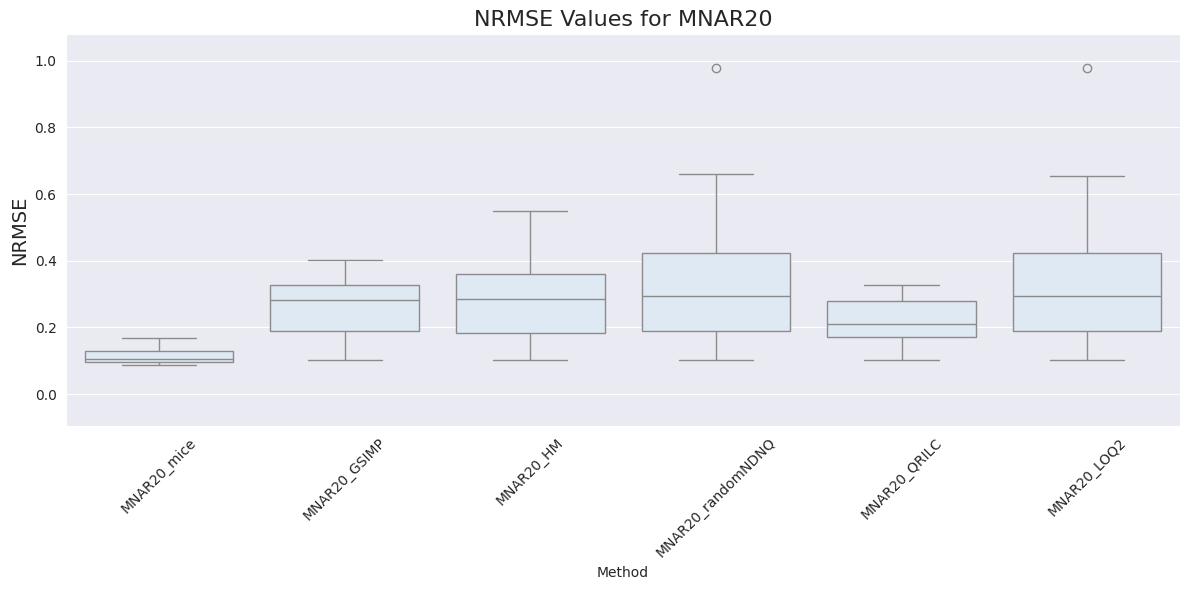

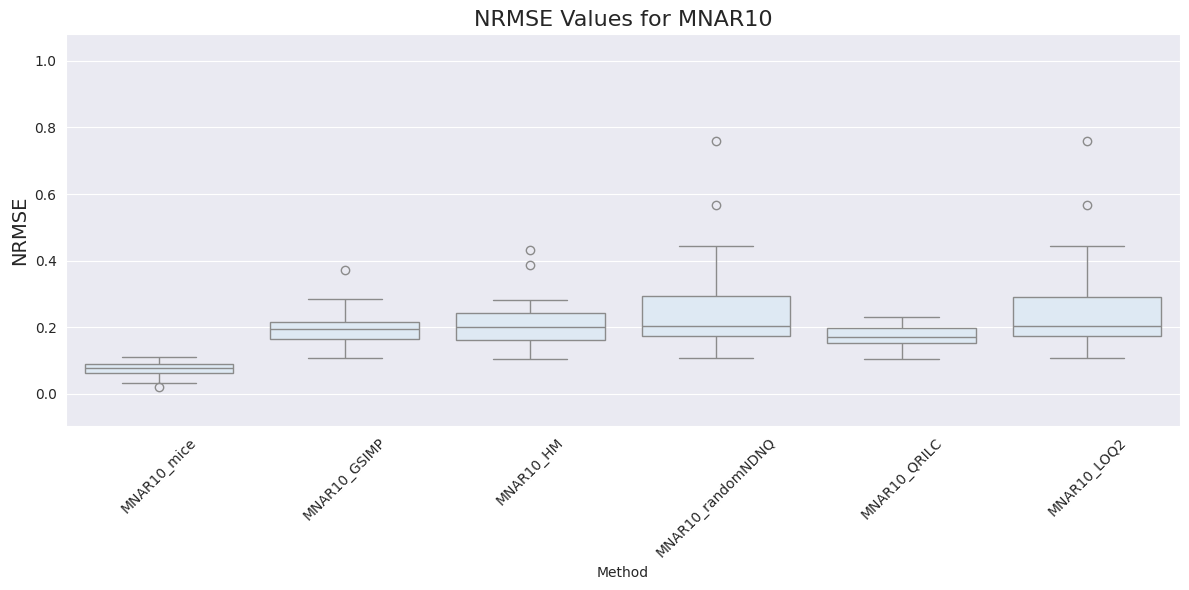

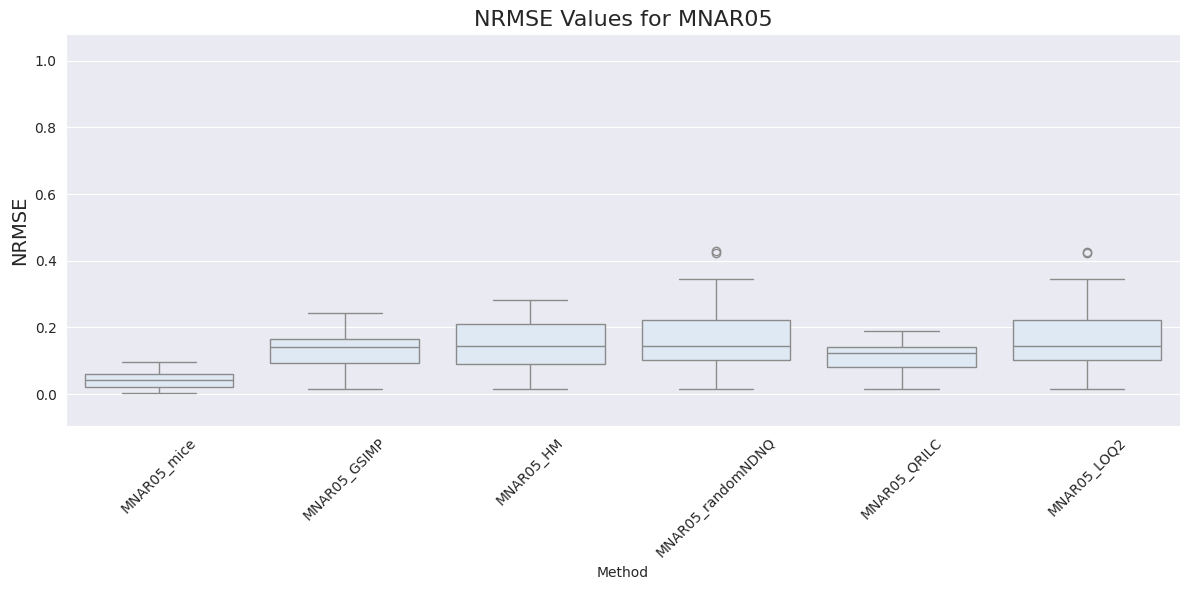

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize datasets
datasets20 = {
    "MNAR20_mice": MNAR20_mice,
    "MNAR20_GSIMP": MNAR20_GSIMP,
    "MNAR20_HM": MNAR20_HM,
    "MNAR20_randomNDNQ": MNAR20_randomNDNQ,
    "MNAR20_QRILC": MNAR20_QRILC,
    "MNAR20_LOQ2": MNAR20_LOQ2
}

datasets10 = {
    "MNAR10_mice": MNAR10_mice,
    "MNAR10_GSIMP": MNAR10_GSIMP,
    "MNAR10_HM": MNAR10_HM,
    "MNAR10_randomNDNQ": MNAR10_randomNDNQ,
    "MNAR10_QRILC": MNAR10_QRILC,
    "MNAR10_LOQ2": MNAR10_LOQ2
}

datasets05 = {
    "MNAR05_mice": MNAR05_mice,
    "MNAR05_GSIMP": MNAR05_GSIMP,
    "MNAR05_HM": MNAR05_HM,
    "MNAR05_randomNDNQ": MNAR05_randomNDNQ,
    "MNAR05_QRILC": MNAR05_QRILC,
    "MNAR05_LOQ2": MNAR05_LOQ2
}


original_datasets = {
    "MNAR20": MNAR20,
    "MNAR10": MNAR10,
    "MNAR05": MNAR05
}

# Mapping columns
column_mapping = {
    'X8.oxo.dGUO': '8-oxo-dGUO',
    'X8.OH.guanosine': '8-OH-guanosine',
    'Kynurenic.acid': 'Kynurenic acid',
    'Quinolinic.acid': 'Quinolinic acid',
    'Xanthurenic.acid': 'Xanthurenic acid'
}

# Rename columns in datasets
for dataset_group in [datasets05, datasets10, datasets20]:
    for name, dataset in dataset_group.items():
        if isinstance(dataset, pd.DataFrame):
            dataset.rename(columns=column_mapping, inplace=True)

# Add 'Groups_encoded' to each dataset
for dataset_group in [datasets20, datasets10, datasets05]:
    for name, dataset in dataset_group.items():
        if isinstance(dataset, pd.DataFrame):
            dataset['Groups_encoded'] = lodq2['Groups_encoded']

# Initialize a DataFrame to store NRMSE values
nrmse_results = []

# Loop through the datasets and calculate NRMSE
for dataset_group, datasets in {'datasets20': datasets20, 'datasets10': datasets10, 'datasets05': datasets05}.items():
    # Get the corresponding original dataset name
    original_key = dataset_group[-2:]  # Get '20', '10', or '05'
    original_data = original_datasets[f'MNAR{original_key}']

    for name, df in datasets.items():
        # Calculate NRMSE for each column
        for col in df.columns:
            if col in original_data.columns:
                nrmse_value = np.sqrt(np.mean((original_data[col] - df[col]) ** 2)) / (original_data[col].max() - original_data[col].min())
                nrmse_results.append({
                    "Method": name,
                    "Variable": col,
                    "NRMSE": nrmse_value,
                    "Missing Percentage": name.split('_')[-2]
                })

# Convert NRMSE results to a DataFrame for easier analysis
nrmse_df = pd.DataFrame(nrmse_results)

# Display the NRMSE results
print(nrmse_df)

# Create a separate boxplot for each missing percentage
missing_percentages = nrmse_df['Missing Percentage'].unique()
for missing in missing_percentages:
    plt.figure(figsize=(12, 6))
    # Set color palette to Blues
    sns.set_palette("Blues")

    # Create boxplot
    sns.boxplot(data=nrmse_df[nrmse_df['Missing Percentage'] == missing], x='Method', y='NRMSE')

    # Adjust y-axis limits for more separation
    plt.ylim(nrmse_df['NRMSE'].min() - 0.1, nrmse_df['NRMSE'].max() + 0.1)

    # Set plot titles and labels
    plt.title(f'NRMSE Values for {missing}', fontsize=16)
    plt.ylabel('NRMSE', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [44]:
# prompt: mirar si algun dataset de datasets20 tiene NA values

# Check for NA values in each dataset within datasets20
for name, dataset in datasets20.items():
  print(f"Dataset: {name}")
  print(dataset.isna().sum())
  print("-" * 20)

Dataset: MNAR20_mice
8-oxo-dGUO          0
8-OH-guanosine      0
Adenosine           0
Anthranilic         0
Dopamine            0
Epinephrine         0
GABA                0
Glutamate           0
Glutamine           0
Histamine           0
Kynurenic acid      0
Kynurenine          0
Melatonin           0
Norepinephrine      0
Quinolinic acid     0
Serotonin           0
Tryptophan          0
Xanthurenic acid    0
Groups_encoded      0
dtype: int64
--------------------
Dataset: MNAR20_GSIMP
8-oxo-dGUO          0
8-OH-guanosine      0
Adenosine           0
Anthranilic         0
Dopamine            0
Epinephrine         0
GABA                0
Glutamate           0
Glutamine           0
Histamine           0
Kynurenic acid      0
Kynurenine          0
Melatonin           0
Norepinephrine      0
Quinolinic acid     0
Serotonin           0
Tryptophan          0
Xanthurenic acid    0
Groups_encoded      0
dtype: int64
--------------------
Dataset: MNAR20_HM
8-oxo-dGUO          0
8-OH-guanosi

In [45]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialize lists to store results for each percentage
classification_results_20 = []
classification_results_10 = []
classification_results_05 = []

# Dictionary of datasets to iterate through
all_datasets = {
    "20": datasets20,
    "10": datasets10,
    "05": datasets05}

# Iterate over the percentages
for key, datasets in all_datasets.items():
    for name, df in datasets.items():
        # Prepare X (features) and y (target variable)
        X = df.drop(columns=['Groups_encoded'])
        y = df['Groups_encoded']

        # Split the data into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and fit Logistic Regression with cross-validation
        model = LogisticRegressionCV(cv=4, random_state=42, max_iter=500, multi_class='auto')
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and other classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store the results in the corresponding list
        result = {"Dataset": name, "Accuracy": accuracy, "F1_Score": f1, "Missing_Percentage": key}
        if key == "20":
            classification_results_20.append(result)
        elif key == "10":
            classification_results_10.append(result)
        elif key == "05":
            classification_results_05.append(result)

# Convert results lists to DataFrames for easier analysis
classification_results_20_df = pd.DataFrame(classification_results_20)
classification_results_10_df = pd.DataFrame(classification_results_10)
classification_results_05_df = pd.DataFrame(classification_results_05)

# Sort the results by Accuracy or F1 score
classification_results_20_df = classification_results_20_df.sort_values(by='Accuracy', ascending=False)
classification_results_10_df = classification_results_10_df.sort_values(by='Accuracy', ascending=False)
classification_results_05_df = classification_results_05_df.sort_values(by='Accuracy', ascending=False)

# Display the results
print("Classification Results for MNAR20:")
print(classification_results_20_df)
print("\nClassification Results for MNAR10:")
print(classification_results_10_df)
print("\nClassification Results for MNAR05:")
print(classification_results_05_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1903: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

Classification Results for MNAR20:
             Dataset     Accuracy     F1_Score Missing_Percentage
0        MNAR20_mice 0.6000000000 0.5419354839                 20
1       MNAR20_GSIMP 0.5500000000 0.5133333333                 20
2          MNAR20_HM 0.5500000000 0.5500000000                 20
3  MNAR20_randomNDNQ 0.5000000000 0.5185185185                 20
4       MNAR20_QRILC 0.5000000000 0.5000000000                 20
5        MNAR20_LOQ2 0.5000000000 0.5185185185                 20

Classification Results for MNAR10:
             Dataset     Accuracy     F1_Score Missing_Percentage
2          MNAR10_HM 0.7000000000 0.5939393939                 10
4       MNAR10_QRILC 0.6000000000 0.5250000000                 10
5        MNAR10_LOQ2 0.6000000000 0.5419354839                 10
0        MNAR10_mice 0.5000000000 0.5185185185                 10
1       MNAR10_GSIMP 0.5000000000 0.4666666667                 10
3  MNAR10_randomNDNQ 0.4000000000 0.4307692308                 10

Clas

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
with pd.ExcelWriter("classification_results.xlsx") as writer:
    # Write each DataFrame to a separate sheet
    classification_results_20_df.to_excel(writer, sheet_name='MNAR20', index=False)
    classification_results_10_df.to_excel(writer, sheet_name='MNAR10', index=False)
    classification_results_05_df.to_excel(writer, sheet_name='MNAR05', index=False)

In [47]:
lodq2.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/lodq2_D1.2.xlsx', index=False)

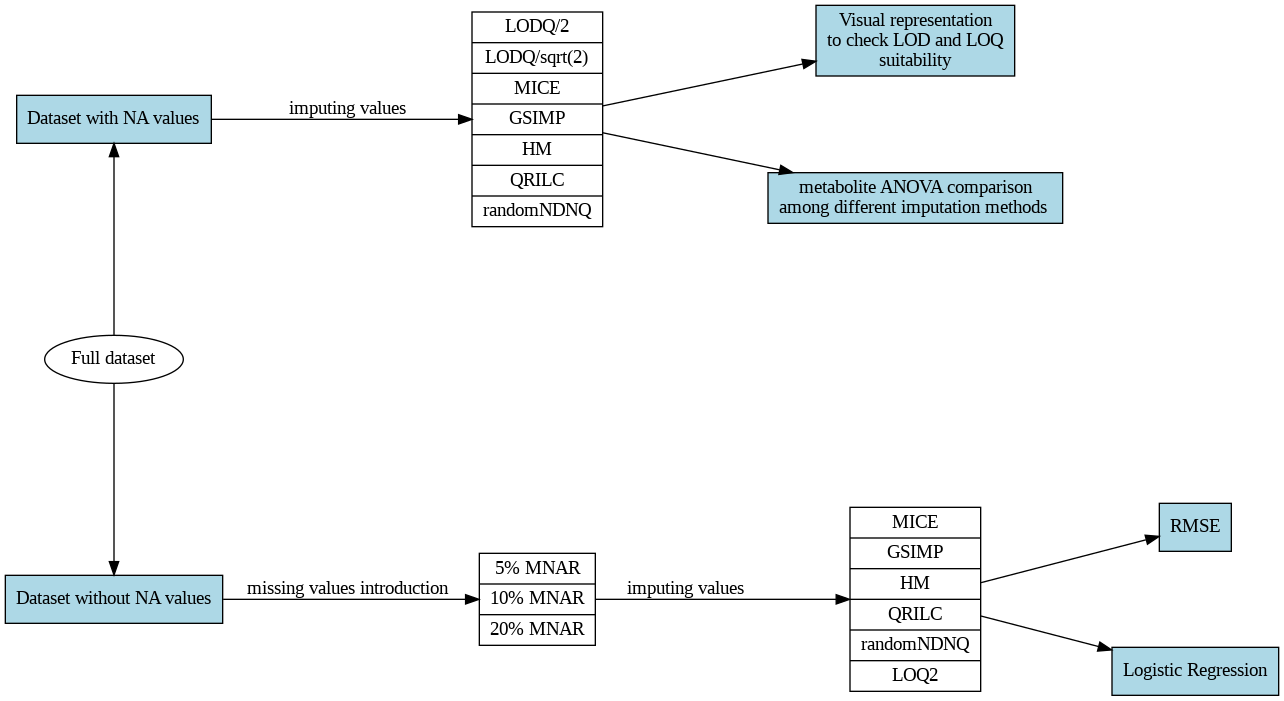

In [48]:
import graphviz
from IPython.display import Image

# New graphic to represent data process to handle missing data
dot = graphviz.Digraph(comment='Diagrama de flujo de datos', graph_attr={'rankdir': 'LR', 'size': '4000', 'nodesep': '1.0', 'ranksep': '0.5'})
node_style = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue'}

dot.node('B', 'Dataset with NA values', **node_style)
dot.node('C', 'Dataset without NA values', **node_style)
dot.node('D', label='LODQ/2|LODQ/sqrt(2)|MICE|GSIMP|HM|QRILC|randomNDNQ', shape='record')
dot.node('E', 'Visual representation\nto check LOD and LOQ\nsuitability', **node_style)
dot.node('F', 'metabolite ANOVA comparison\namong different imputation methods ', **node_style)
dot.node('G', label='5% MNAR|10% MNAR|20% MNAR', shape='record')
dot.node('H', label='MICE|GSIMP|HM|QRILC|randomNDNQ|LOQ2', shape='record')
dot.node('I', 'RMSE', **node_style)
dot.node('J', 'Logistic Regression', **node_style)

with dot.subgraph() as s:
    s.attr(rank='same')  # Ensures B and C are on the same level
    dot.edge('Full dataset', 'B', constraint='false')
    dot.edge('Full dataset', 'C', constraint='false')

with dot.subgraph() as s:
    s.attr(rank='same')  # Ensures D and G are on the same level
    dot.edge('B', 'D', label = "imputing values")
    dot.edge('C', 'G', label = "missing values introduction")

dot.edge('G', 'H', label = "imputing values")

with dot.subgraph() as s:
    s.attr(rank='same')  # Ensures E, F, H and I are on the same level
    dot.edge('D', 'E')
    dot.edge('D', 'F')
    dot.edge('H', 'I')
    dot.edge('H', 'J')


# Render and display the graph
dot.render('data_flow_diagram', format='png')
Image(filename='data_flow_diagram.png')

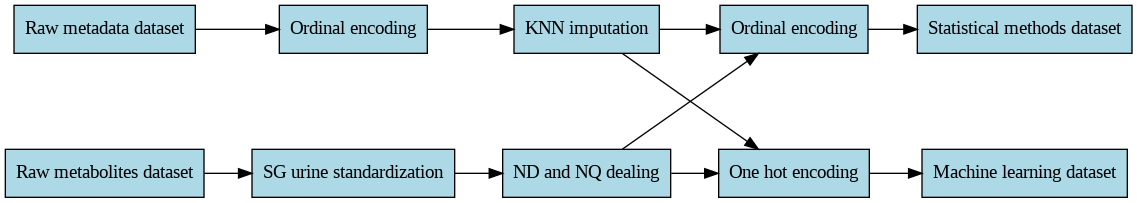

In [49]:
import graphviz
from IPython.display import Image

# Create a new Digraph for the data processing workflow
dot = graphviz.Digraph(comment='Data Processing Workflow', graph_attr={'rankdir': 'LR', 'size': '4000', 'nodesep': '1.0', 'ranksep': '0.5'})
node_style = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue'}

# Level 1 nodes (Raw Datasets)
dot.node('A', 'Raw metadata dataset', **node_style)
dot.node('B', 'Raw metabolites dataset', **node_style)

# Level 2 nodes (Processing Steps)
dot.node('C', 'Ordinal encoding', **node_style)
dot.node('D1', 'KNN imputation', **node_style)
dot.node('D2', 'SG urine standardization', **node_style)
dot.node('E', 'ND and NQ dealing', **node_style)

# Level 3 nodes (Encoding and Data Handling for different paths)
dot.node('F1', 'Ordinal encoding', **node_style)
dot.node('F2', 'One hot encoding', **node_style)

# Level 4 nodes (Final Processed Datasets for Analysis)
dot.node('G', 'Machine learning dataset', **node_style)
dot.node('H', 'Statistical methods dataset', **node_style)

# Edges between nodes to show the workflow
dot.edge('A', 'C')         # Raw metadata -> Ordinal Encoding
dot.edge('C', 'D1')         # Ordinal Encoding -> KNN Imputation
dot.edge('B', 'D2')         # Raw metabolites -> SG Standardization
dot.edge('D2', 'E')         # SG Standardization -> ND and NQ Dealing

# Combine intermediate level to different paths
dot.edge('D1', 'F2')        # KNN Imputation -> One Hot Encoding (Path 2)
dot.edge('D1', 'F1')        # KNN Imputation -> Ordinal Encoding (Path 1)
dot.edge('E', 'F1')         # ND and NQ Dealing -> Statistical Methods Data (Path 1)
dot.edge('E', 'F2')         # ND and NQ Dealing -> Machine Learning Data (Path 2)

# Final paths to level 4 nodes
dot.edge('F1', 'H')         # Path 1 -> Statistical Methods Data
dot.edge('F2', 'G')         # Path 2 -> Machine Learning Data

# Render and display the graph
dot.render('data_processing_workflow_final', format='png')
Image(filename='data_processing_workflow_final.png')
